In [1]:
from pathlib import Path
path = Path('/home/alilavaee/Desktop/PlantifyDr/PlantDiseasesDataset')

In [2]:
# Download dataset with Kaggle API
# ! kaggle datasets download lavaman151/plantifydr-dataset --unzip

In [3]:
from fastai.vision.all import *

In [4]:
path.ls()

(#10) [Path('/home/alilavaee/Desktop/plantifydr/PlantDiseasesDataset/Bell pepper'),Path('/home/alilavaee/Desktop/plantifydr/PlantDiseasesDataset/Corn'),Path('/home/alilavaee/Desktop/plantifydr/PlantDiseasesDataset/Grape'),Path('/home/alilavaee/Desktop/plantifydr/PlantDiseasesDataset/Strawberry'),Path('/home/alilavaee/Desktop/plantifydr/PlantDiseasesDataset/Citrus'),Path('/home/alilavaee/Desktop/plantifydr/PlantDiseasesDataset/Tomato'),Path('/home/alilavaee/Desktop/plantifydr/PlantDiseasesDataset/Cherry'),Path('/home/alilavaee/Desktop/plantifydr/PlantDiseasesDataset/Peach'),Path('/home/alilavaee/Desktop/plantifydr/PlantDiseasesDataset/Potato'),Path('/home/alilavaee/Desktop/plantifydr/PlantDiseasesDataset/Apple')]

In [5]:
plant_list = ['Apple','Bell pepper','Cherry','Citrus','Corn','Grape','Peach','Potato','Strawberry','Tomato']
plant = 'Peach'

In [6]:
model_path = Path(path/plant)

In [7]:
batch_tfms=[Normalize.from_stats(*imagenet_stats)]

In [8]:
dls = ImageDataLoaders.from_folder(path/plant,train='train',valid_pct=0.2,seed=1000,item_tfms=Resize(224),
                                   batch_tfms=batch_tfms,bs=128)

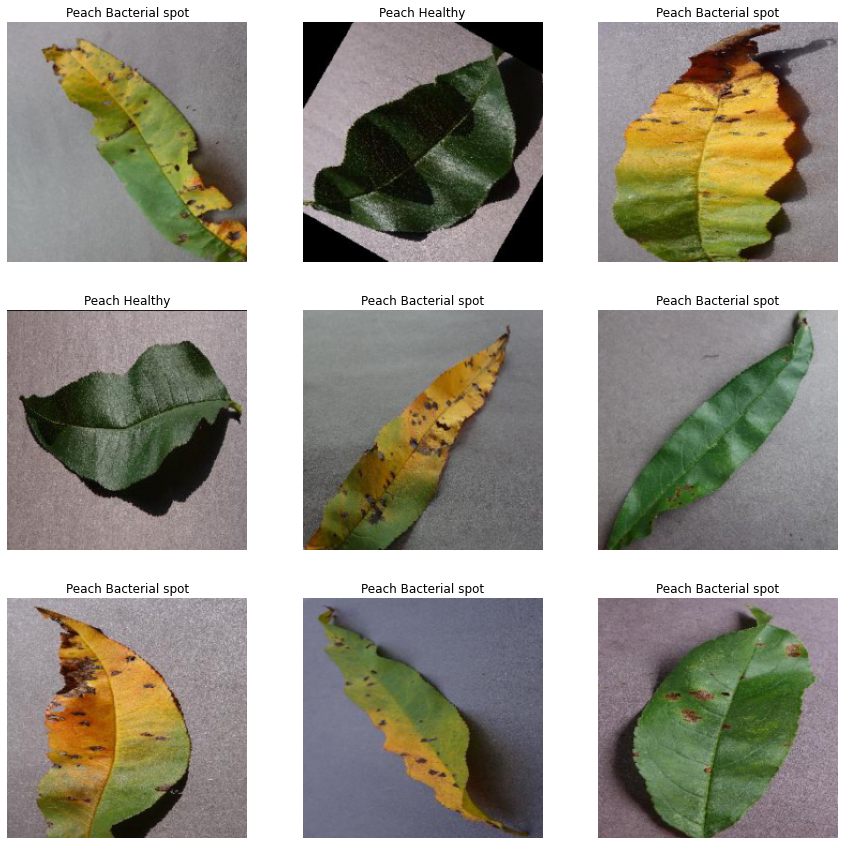

In [9]:
dls.show_batch(figsize=(15,15))

In [10]:
f1 = F1Score(average='weighted')
mcc = MatthewsCorrCoef()

In [11]:
learn = cnn_learner(dls, models.resnet50,loss_func=LabelSmoothingCrossEntropy(),metrics=[accuracy,f1,mcc],
                    cbs=[SaveModelCallback(monitor='accuracy'),EarlyStoppingCallback(monitor='accuracy',patience=2)
                         ,ShowGraphCallback()],model_dir=model_path/'models').to_fp16()

epoch,train_loss,valid_loss,accuracy,f1_score,matthews_corrcoef,time
0,0.505952,0.362558,0.982711,0.982778,0.962343,00:21
1,0.408288,0.287403,0.995159,0.995160,0.989286,00:18
2,0.359884,0.263312,0.997925,0.997927,0.995423,00:18
3,0.319796,0.249664,0.995159,0.995165,0.989334,00:18
4,0.280860,0.221826,0.998617,0.998616,0.996939,00:18
5,0.255225,0.220991,0.999308,0.999308,0.998469,00:18
6,0.237036,0.209507,1.000000,1.000000,1.000000,00:18
7,0.225296,0.206418,1.000000,1.000000,1.000000,00:18
8,0.219817,0.206638,1.000000,1.000000,1.000000,00:18


Better model found at epoch 0 with accuracy value: 0.9827108979225159.


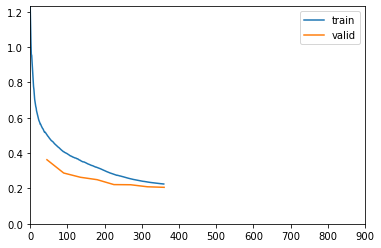

Better model found at epoch 1 with accuracy value: 0.9951590299606323.
Better model found at epoch 2 with accuracy value: 0.9979252815246582.
Better model found at epoch 4 with accuracy value: 0.9986168742179871.
Better model found at epoch 5 with accuracy value: 0.9993084073066711.
Better model found at epoch 6 with accuracy value: 1.0.
No improvement since epoch 6: early stopping


In [12]:
learn.fit_one_cycle(20)

epoch,train_loss,valid_loss,accuracy,f1_score,matthews_corrcoef,time
0,0.223096,0.215409,1.000000,1.000000,1.000000,00:18


Better model found at epoch 0 with accuracy value: 1.0.


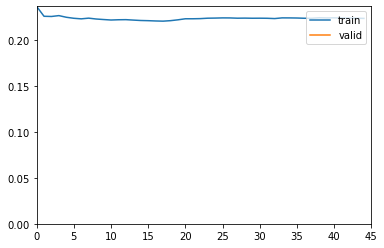

epoch,train_loss,valid_loss,accuracy,f1_score,matthews_corrcoef,time
0,0.218975,0.224158,1.000000,1.000000,1.000000,00:24
1,0.212656,0.207346,1.000000,1.000000,1.000000,00:24
2,0.210240,0.208011,1.000000,1.000000,1.000000,00:24


Better model found at epoch 0 with accuracy value: 1.0.


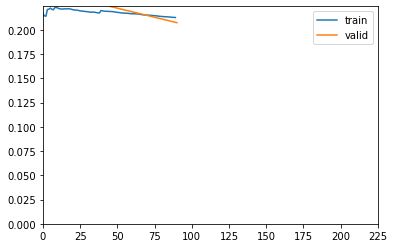

No improvement since epoch 0: early stopping


In [13]:
learn.fine_tune(5)

In [14]:
learn = learn.to_fp32()

In [15]:
learn.save(model_path/f'models/{plant}')

Path('/home/alilavaee/Desktop/plantifydr/PlantDiseasesDataset/Peach/models/Peach.pth')

In [16]:
learn = cnn_learner(dls, models.resnet50).load(model_path/f'models/{plant}')

In [17]:
learn.summary()

Sequential (Input shape: 128)
Layer (type)         Output Shape         Param #    Trainable 
                     128 x 64 x 112 x 11 
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
MaxPool2d                                                      
Conv2d                                    4096       False     
BatchNorm2d                               128        True      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
____________________________________________________________________________
                     128 x 256 x 56 x 56 
Conv2d                                    16384      False     
BatchNorm2d                               512        True      
ReLU                                                           
_________________________________________

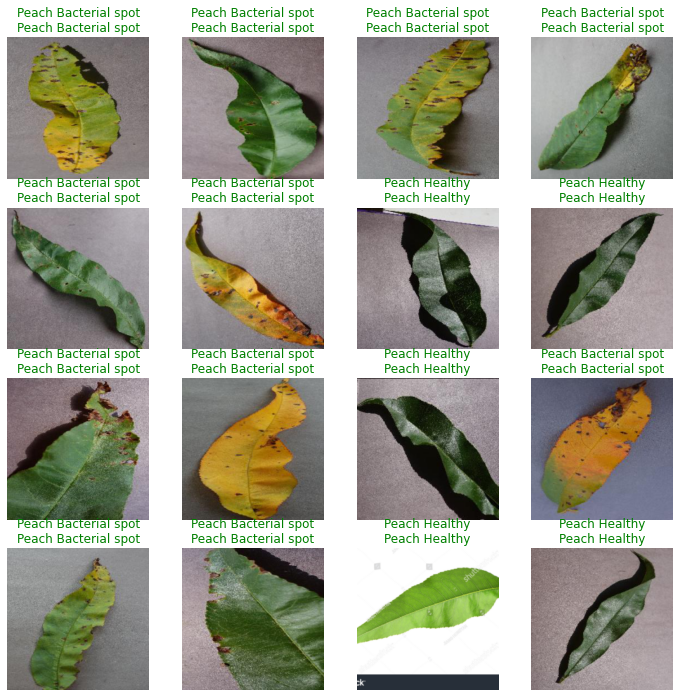

In [18]:
learn.show_results(max_n=16)

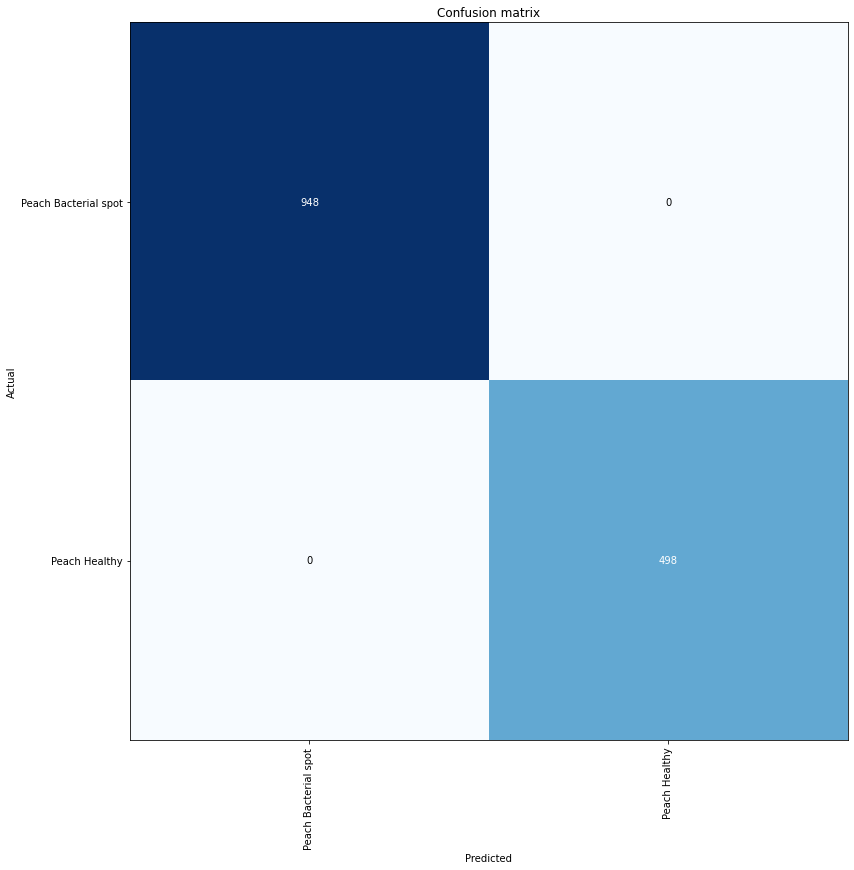

In [19]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
interp.plot_confusion_matrix(figsize=(12,12))

In [20]:
learn.export(f'{plant}.pkl')